<a href="https://colab.research.google.com/github/staserix/perditore-oro/blob/main/final_ptoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Carica il file CSV per GAU_EUR (il dataset originale)
df = pd.read_csv("/content/drive/MyDrive/esame 5'o/GAU_EUR Dati Storici.csv")
print("Prime righe di df (GAU_EUR):")
display(df.head())

# Carica il file CSV per BNQL
df_bnql = pd.read_csv("/content/drive/MyDrive/esame 5'o/Storico BNQL.csv")
print("\nPrime righe di df_bnql:")
display(df_bnql.head())

# Carica il file CSV per XAGg_EUR
df_xagg_eur = pd.read_csv("/content/drive/MyDrive/esame 5'o/XAGg_EUR Dati Storici.csv")
print("\nPrime righe di df_xagg_eur:")
display(df_xagg_eur.head())

# Carica il file CSV per XPT_EUR
df_xpt_eur = pd.read_csv("/content/drive/MyDrive/esame 5'o/XPT_EUR Dati Storici.csv")
print("\nPrime righe di df_xpt_eur:")
display(df_xpt_eur.head())

Prime righe di df (GAU_EUR):


,Data,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
0,23.03.2018,"35,055","34,771","35,145","34,758",NaN,"0,79%"
1,25.03.2018,"35,124","35,064","35,124","35,041",NaN,"0,20%"
2,26.03.2018,"34,901","35,092","35,094","34,901",NaN,"-0,63%"
3,27.03.2018,"34,854","34,921","34,990","34,784",NaN,"-0,13%"
4,28.03.2018,"34,597","34,853","34,886","34,527",NaN,"-0,74%"



Prime righe di df_bnql:


,Data,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
0,11.06.2018,"85,18","85,18","85,18","85,18",NaN,"0,45%"
1,12.06.2018,"85,79","85,79","85,79","85,79",NaN,"0,70%"
2,13.06.2018,"84,92","84,92","84,92","84,92",NaN,"-1,01%"
3,14.06.2018,"84,56","84,56","84,56","84,56",NaN,"-0,42%"
4,15.06.2018,"83,17","83,17","83,17","83,17",NaN,"-1,64%"



Prime righe di df_xagg_eur:


,Data,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
0,16.03.2020,"0,3750","0,4261","0,4277","0,3403",NaN,"-12,07%"
1,17.03.2020,"0,3726","0,3750","0,3853","0,3532",NaN,"-0,61%"
2,18.03.2020,"0,3602","0,3727","0,3761","0,3454",NaN,"-3,35%"
3,19.03.2020,"0,3656","0,3615","0,3686","0,3490",NaN,"1,50%"
4,20.03.2020,"0,3787","0,3655","0,3874","0,3655",NaN,"3,58%"



Prime righe di df_xpt_eur:


,Data,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
0,01.09.2006,"967,4404","967,5152","974,4434","966,6095",NaN,"0,02%"
1,04.09.2006,"968,6942","966,7627","971,8112","960,1928",NaN,"0,13%"
2,05.09.2006,"989,1567","969,5226","990,1609","968,9953",NaN,"2,11%"
3,06.09.2006,"986,1794","989,0796","994,3627","983,3255",NaN,"-0,30%"
4,07.09.2006,"977,4672","986,1794","988,1856","974,2031",NaN,"-0,88%"


In [52]:
import pandas as pd


# Processamento per df oro"
df_subset = df[['Data', 'Ultimo']].copy()
df_subset['Data'] = pd.to_datetime(df_subset['Data'], format="%d.%m.%Y")
df_subset = df_subset.set_index('Data')
df_subset['Ultimo'] = df_subset['Ultimo'].astype(str).str.replace(',', '.', regex=False).astype(float)
df_subset['Ultimo_lag1'] = df_subset['Ultimo'].shift(1)
df_subset['Ultimo_lag7'] = df_subset['Ultimo'].shift(7)
df_subset['Ultimo_rolling_mean7'] = df_subset['Ultimo'].rolling(window=7).mean()
df_subset = df_subset.dropna()

train_size = int(len(df_subset) * 0.8)
y = df_subset['Ultimo']
X = df_subset.drop('Ultimo', axis=1)
X_train, X_test = X[0:train_size], X[train_size:len(df_subset)]
y_train, y_test = y[0:train_size], y[train_size:len(df_subset)]

print("Dimensioni del set di addestramento (GAU_EUR):")
print(f"X_train = {X_train.shape}, y_train = {y_train.shape}\n")
print("Dimensioni del set di test (GAU_EUR):")
print(f"X_test = {X_test.shape}, y_test = {y_test.shape}\n")

# Processamento per df_bnql
df_bnql_subset = df_bnql[['Data', 'Ultimo']].copy()
df_bnql_subset['Data'] = pd.to_datetime(df_bnql_subset['Data'], format="%d.%m.%Y")
df_bnql_subset = df_bnql_subset.set_index('Data')
df_bnql_subset['Ultimo'] = df_bnql_subset['Ultimo'].astype(str).str.replace(',', '.', regex=False).astype(float)
df_bnql_subset['Ultimo_lag1'] = df_bnql_subset['Ultimo'].shift(1)
df_bnql_subset['Ultimo_lag7'] = df_bnql_subset['Ultimo'].shift(7)
df_bnql_subset['Ultimo_rolling_mean7'] = df_bnql_subset['Ultimo'].rolling(window=7).mean()
df_bnql_subset = df_bnql_subset.dropna()

train_size_bnql = int(len(df_bnql_subset) * 0.8)
X_bnql = df_bnql_subset.drop('Ultimo', axis=1)
y_bnql = df_bnql_subset['Ultimo']
X_train_bnql, X_test_bnql = X_bnql[0:train_size_bnql], X_bnql[train_size_bnql:len(df_bnql_subset)]
y_train_bnql, y_test_bnql = y_bnql[0:train_size_bnql], y_bnql[train_size_bnql:len(df_bnql_subset)]

print("Dimensioni del set di addestramento (BNQL):")
print(f"X_train_bnql = {X_train_bnql.shape}, y_train_bnql = {y_train_bnql.shape}\n")
print("Dimensioni del set di test (BNQL):")
print(f"X_test_bnql = {X_test_bnql.shape}, y_test_bnql = {y_test_bnql.shape}\n")

# Processamento per df_xagg_eur
df_xagg_eur_subset = df_xagg_eur[['Data', 'Ultimo']].copy()
df_xagg_eur_subset['Data'] = pd.to_datetime(df_xagg_eur_subset['Data'], format="%d.%m.%Y")
df_xagg_eur_subset = df_xagg_eur_subset.set_index('Data')
df_xagg_eur_subset['Ultimo'] = df_xagg_eur_subset['Ultimo'].astype(str).str.replace(',', '.', regex=False).astype(float)
df_xagg_eur_subset['Ultimo_lag1'] = df_xagg_eur_subset['Ultimo'].shift(1)
df_xagg_eur_subset['Ultimo_lag7'] = df_xagg_eur_subset['Ultimo'].shift(7)
df_xagg_eur_subset['Ultimo_rolling_mean7'] = df_xagg_eur_subset['Ultimo'].rolling(window=7).mean()
df_xagg_eur_subset = df_xagg_eur_subset.dropna()

train_size_xagg = int(len(df_xagg_eur_subset) * 0.8)
X_xagg = df_xagg_eur_subset.drop('Ultimo', axis=1)
y_xagg = df_xagg_eur_subset['Ultimo']
X_train_xagg, X_test_xagg = X_xagg[0:train_size_xagg], X_xagg[train_size_xagg:len(df_xagg_eur_subset)]
y_train_xagg, y_test_xagg = y_xagg[0:train_size_xagg], y_xagg[train_size_xagg:len(df_xagg_eur_subset)]

print("Dimensioni del set di addestramento (XAGG):")
print(f"X_train_xagg = {X_train_xagg.shape}, y_train_xagg = {y_train_xagg.shape}\n")
print("Dimensioni del set di test (XAGG):")
print(f"X_test_xagg = {X_test_xagg.shape}, y_test_xagg = {y_test_xagg.shape}\n")

# Processamento per df_xpt_eur - Modifica per gestire il formato numerico con punto come separatore migliaia
df_xpt_eur_subset = df_xpt_eur[['Data', 'Ultimo']].copy()
df_xpt_eur_subset['Data'] = pd.to_datetime(df_xpt_eur_subset['Data'], format="%d.%m.%Y")
df_xpt_eur_subset = df_xpt_eur_subset.set_index('Data')
# Sostituisci sia la virgola che il punto con una stringa vuota prima di convertire in float
df_xpt_eur_subset['Ultimo'] = df_xpt_eur_subset['Ultimo'].astype(str).str.replace('[.,]', '', regex=True).astype(float)
df_xpt_eur_subset['Ultimo_lag1'] = df_xpt_eur_subset['Ultimo'].shift(1)
df_xpt_eur_subset['Ultimo_lag7'] = df_xpt_eur_subset['Ultimo'].shift(7)
df_xpt_eur_subset['Ultimo_rolling_mean7'] = df_xpt_eur_subset['Ultimo'].rolling(window=7).mean()
df_xpt_eur_subset = df_xpt_eur_subset.dropna()

train_size_xpt = int(len(df_xpt_eur_subset) * 0.8)
X_xpt = df_xpt_eur_subset.drop('Ultimo', axis=1)
y_xpt = df_xpt_eur_subset['Ultimo']
X_train_xpt, X_test_xpt = X_xpt[0:train_size_xpt], X_xpt[train_size_xpt:len(df_xpt_eur_subset)]
y_train_xpt, y_test_xpt = y_xpt[0:train_size_xpt], y_xpt[train_size_xpt:len(df_xpt_eur_subset)]

print("Dimensioni del set di addestramento (XPT):")
print(f"X_train_xpt = {X_train_xpt.shape}, y_train_xpt = {y_train_xpt.shape}\n")
print("Dimensioni del set di test (XPT):")
print(f"X_test_xpt = {X_test_xpt.shape}, y_test_xpt = {y_test_xpt.shape}\n")

Dimensioni del set di addestramento (GAU_EUR):
X_train = (1707, 3), y_train = (1707,)

Dimensioni del set di test (GAU_EUR):
X_test = (427, 3), y_test = (427,)

Dimensioni del set di addestramento (BNQL):
X_train_bnql = (1420, 3), y_train_bnql = (1420,)

Dimensioni del set di test (BNQL):
X_test_bnql = (356, 3), y_test_bnql = (356,)

Dimensioni del set di addestramento (XAGG):
X_train_xagg = (1234, 3), y_train_xagg = (1234,)

Dimensioni del set di test (XAGG):
X_test_xagg = (309, 3), y_test_xagg = (309,)

Dimensioni del set di addestramento (XPT):
X_train_xpt = (3921, 3), y_train_xpt = (3921,)

Dimensioni del set di test (XPT):
X_test_xpt = (981, 3), y_test_xpt = (981,)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Dizionari per archiviare le metriche
r2_scores = {}
direction_accuracy = {}

# Funzione per addestrare il modello e calcolare le metriche
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcolo R²
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2

    # Calcolo percentuale previsioni corrette sulla direzione
    correct_direction_predictions = np.sum([1 if np.sign(y_pred[i+1] - y_test.iloc[i]) == np.sign(y_test.iloc[i+1] - y_test.iloc[i]) else 0 for i in range(len(y_test)-1)])
    percentage_correct_direction = (correct_direction_predictions / (len(y_test) - 1)) * 100
    direction_accuracy[model_name] = percentage_correct_direction

    print(f"--- {model_name} ---")
    print(f"R-quadrato (R²): {r2:.4f}")
    print(f"Percentuale di previsioni corrette sulla direzione: {percentage_correct_direction:.2f}%\n")


# Addestramento e valutazione per il modello originale (GAU_EUR)
# Assicurati che le variabili X_train, X_test, y_train, y_test siano disponibili dal codice precedente
try:
    train_and_evaluate(X_train, X_test, y_train, y_test, 'GAU_EUR')
except NameError:
    print("Variabili del modello GAU_EUR non trovate. Assicurati che le celle precedenti siano state eseguite.")


# Addestramento e valutazione per il modello BNQL
train_and_evaluate(X_train_bnql, X_test_bnql, y_train_bnql, y_test_bnql, 'BNQL')

# Addestramento e valutazione per il modello XAGg_EUR
train_and_evaluate(X_train_xagg, X_test_xagg, y_train_xagg, y_test_xagg, 'XAGg_EUR')

# Addestramento e valutazione per il modello XPT_EUR
train_and_evaluate(X_train_xpt, X_test_xpt, y_train_xpt, y_test_xpt, 'XPT_EUR')

--- GAU_EUR ---
R-quadrato (R²): 0.9961
Percentuale di previsioni corrette sulla direzione: 58.45%

--- BNQL ---
R-quadrato (R²): 0.8237
Percentuale di previsioni corrette sulla direzione: 56.90%

--- XAGg_EUR ---
R-quadrato (R²): 0.9200
Percentuale di previsioni corrette sulla direzione: 53.57%

--- XPT_EUR ---
R-quadrato (R²): 0.9314
Percentuale di previsioni corrette sulla direzione: 57.04%



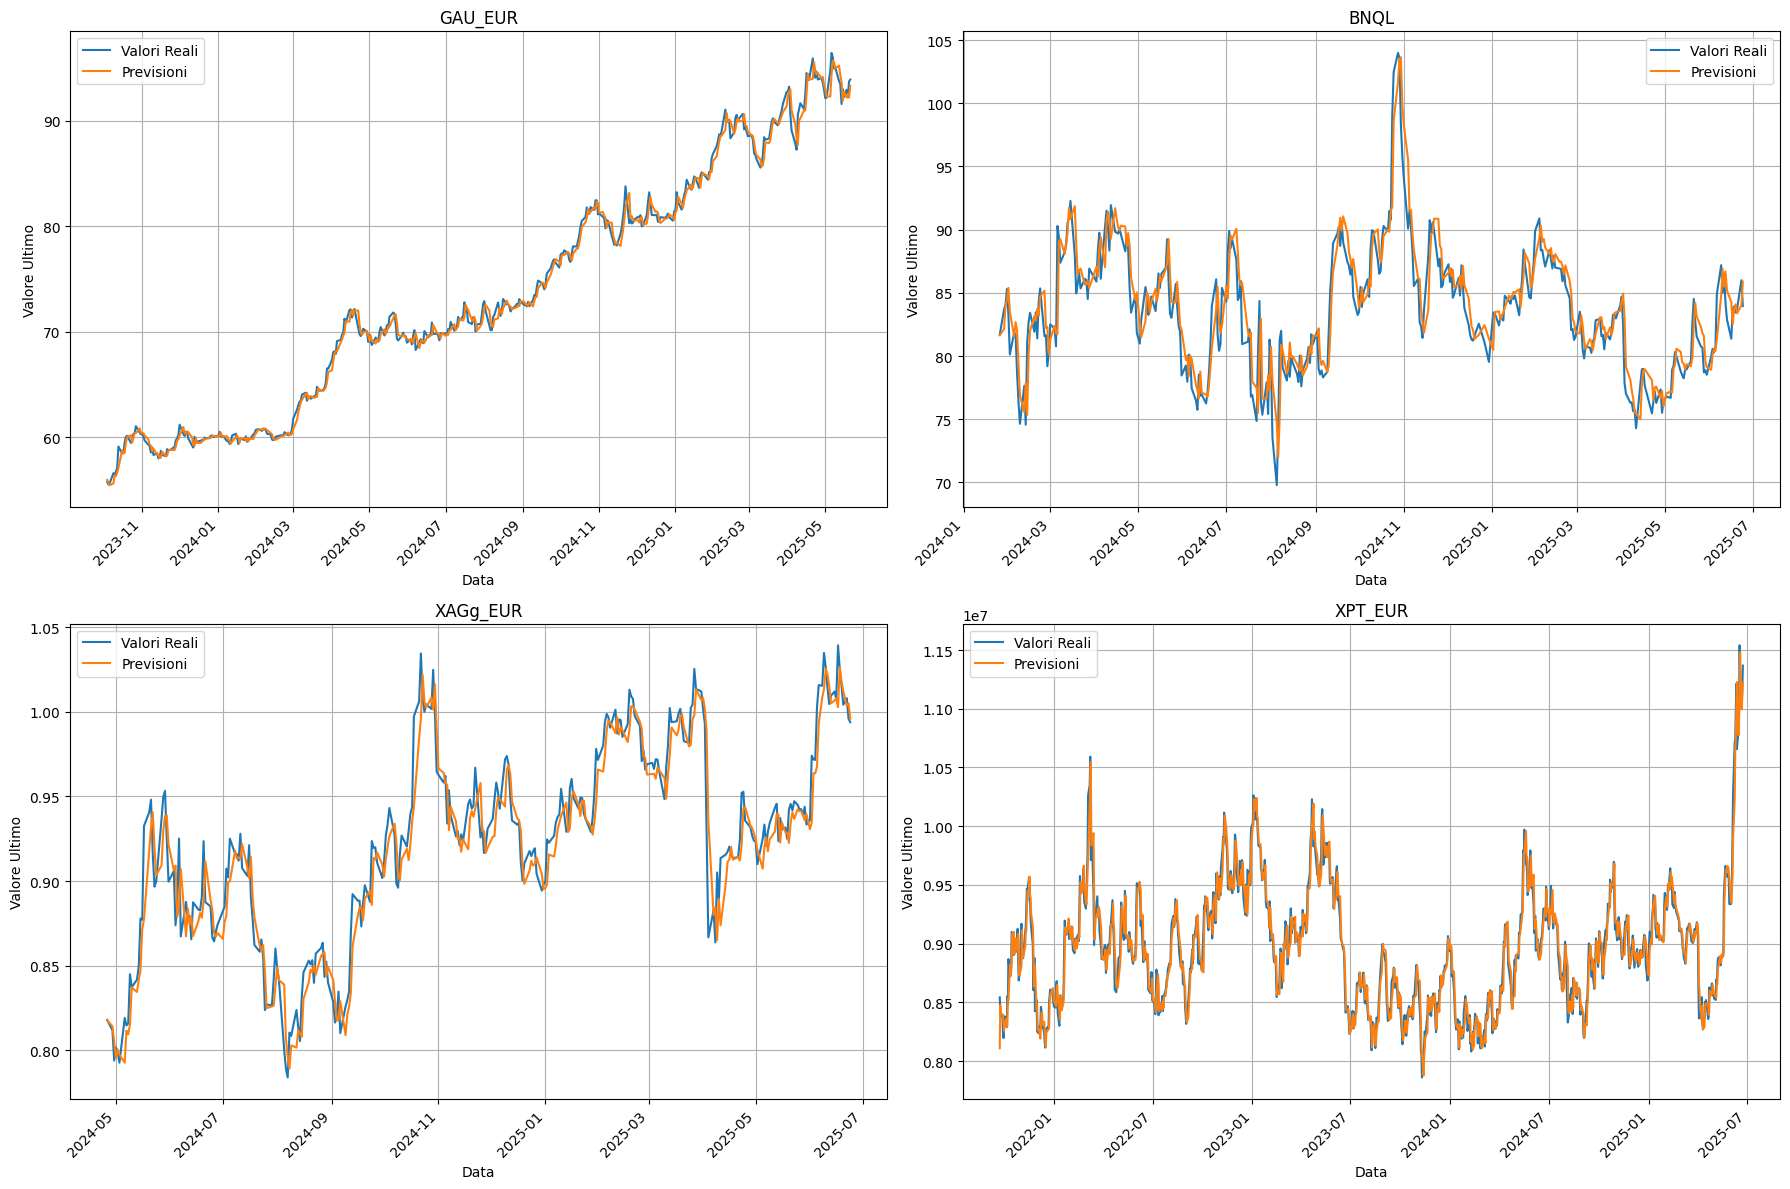

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np # Import numpy for arange

# Funzione per creare il grafico delle previsioni vs valori reali
def plot_predictions(ax, y_test, y_pred, model_name):
    ax.plot(y_test.index, y_test, label='Valori Reali')
    ax.plot(y_test.index, y_pred, label='Previsioni')
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Valore Ultimo')
    ax.legend()
    ax.grid(True)
    # Imposta i tick sull'asse x per evitare sovrapposizioni
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")


# Addestra e genera previsioni per ciascun modello per la visualizzazione
models_data = {
    'ORO': (X_train, X_test, y_train, y_test),
    'PALADIUM': (X_train_bnql, X_test_bnql, y_train_bnql, y_test_bnql),
    'ARGENTO': (X_train_xagg, X_test_xagg, y_train_xagg, y_test_xagg),
    'PLATINO': (X_train_xpt, X_test_xpt, y_train_xpt, y_test_xpt)
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12)) # Crea una figura con 2x2 sotto-grafici
axes = axes.flatten() # Appiattisce l'array di assi per un facile accesso

for i, (model_name, (X_train_m, X_test_m, y_train_m, y_test_m)) in enumerate(models_data.items()):
    model = LinearRegression()
    model.fit(X_train_m, y_train_m)
    y_pred_m = model.predict(X_test_m)
    plot_predictions(axes[i], y_test_m, y_pred_m, model_name)

plt.tight_layout() # Adatta automaticamente i parametri del subplot per adattarsi all'area della figura.
plt.show()

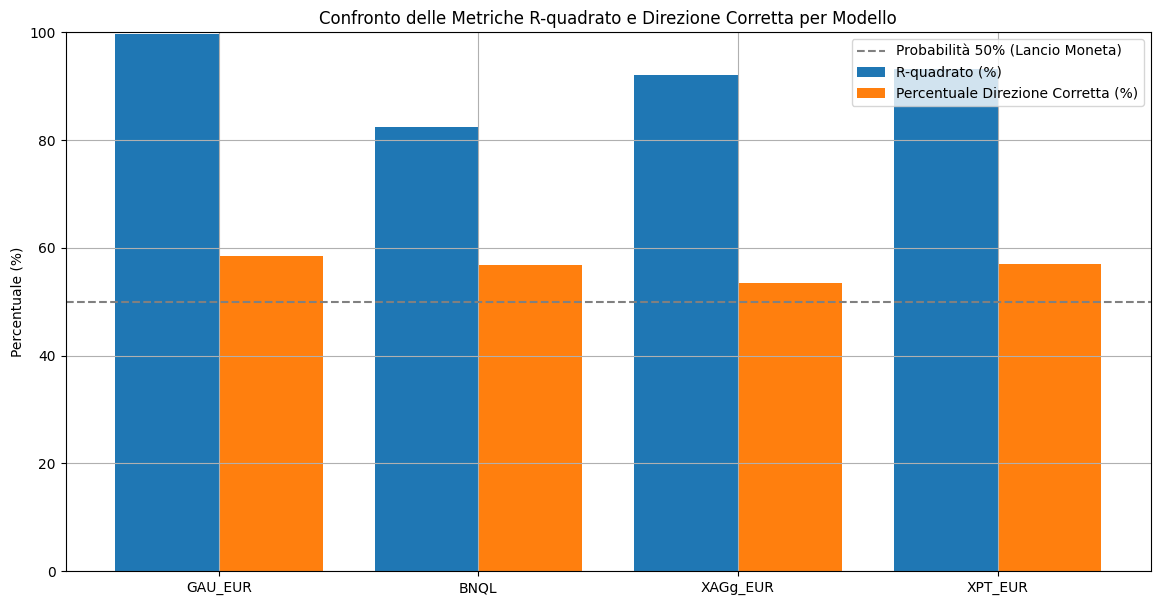

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dati per il grafico
models = list(r2_scores.keys())
r2_values = [r2_scores[model] * 100 for model in models]
direction_values = [direction_accuracy[model] for model in models]

x = np.arange(len(models)) # Posizioni delle barre

plt.figure(figsize=(14, 7))

# Grafico per R-quadrato
plt.bar(x - 0.2, r2_values, 0.4, label='R-quadrato (%)')

# Grafico per Percentuale Direzione Corretta
plt.bar(x + 0.2, direction_values, 0.4, label='Percentuale Direzione Corretta (%)')

# Linea di riferimento 50%
plt.axhline(y=50, color='gray', linestyle='--', label='Probabilità 50% (Lancio Moneta)')

plt.ylabel('Percentuale (%)')
plt.title('Confronto delle Metriche R-quadrato e Direzione Corretta per Modello')
plt.xticks(x, models)
plt.ylim(0, 100) # Imposta l'asse y da 0 a 100
plt.legend()
plt.grid(True)
plt.show()